# Exploratory Data Analysis

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_path_customer = 'data\Customer Loyalty History.csv' 
file_path_flight = 'data\Customer Flight Activity.csv'

df_customer = pd.read_csv(file_path_customer)
df_flight = pd.read_csv(file_path_flight)

## Customer Loyalty History

In [2]:
df_customer.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [3]:
df_customer.count()

Loyalty Number        16737
Country               16737
Province              16737
City                  16737
Postal Code           16737
Gender                16737
Education             16737
Salary                12499
Marital Status        16737
Loyalty Card          16737
CLV                   16737
Enrollment Type       16737
Enrollment Year       16737
Enrollment Month      16737
Cancellation Year      2067
Cancellation Month     2067
dtype: int64

In [4]:
df_customer.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


### Customer Demographics

#### Demographics - Location (Country, Provice, City, Postcode), Gender, Salary, Education and Marital Status

In [5]:
df_customer[df_customer['Country']!='Canada']

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [16]:
round(df_customer['Province'].value_counts(normalize=True)*100,1)

Province
Ontario                 32.3
British Columbia        26.3
Quebec                  19.7
Alberta                  5.8
Manitoba                 3.9
New Brunswick            3.8
Nova Scotia              3.1
Saskatchewan             2.4
Newfoundland             1.5
Yukon                    0.7
Prince Edward Island     0.4
Name: proportion, dtype: float64

In [8]:
df_customer['City'].unique()

array(['Toronto', 'Edmonton', 'Vancouver', 'Hull', 'Whitehorse',
       'Trenton', 'Montreal', 'Dawson Creek', 'Quebec City',
       'Fredericton', 'Ottawa', 'Tremblant', 'Calgary', 'Thunder Bay',
       'Whistler', 'Peace River', 'Winnipeg', 'Sudbury', 'West Vancouver',
       'Halifax', 'London', 'Regina', 'Kelowna', "St. John's", 'Victoria',
       'Kingston', 'Banff', 'Moncton', 'Charlottetown'], dtype=object)

In [10]:
df_customer['Gender'].value_counts()

Gender
Female    8410
Male      8327
Name: count, dtype: int64

In [20]:
df_customer['Marital Status'].value_counts(normalize=True)*100

Marital Status
Married     58.164546
Single      26.790942
Divorced    15.044512
Name: proportion, dtype: float64

In [21]:
df_customer['Education'].value_counts(normalize=True)*100

Education
Bachelor                62.585888
College                 25.321145
High School or Below     4.672283
Doctor                   4.385493
Master                   3.035191
Name: proportion, dtype: float64

In [42]:
## Salary analysis

df_droppedna = df_customer['Salary'].dropna()

(df_droppedna<0).value_counts()

Salary
False    12479
True        20
Name: count, dtype: int64


Quick Observations

1. Equal percentage of gender
2. Country in-focus is Canada
3. 78% of the members come from 3 provinces - Ontario, British Columbia, Quebec
4. 58% of the members are married - familt oriented marketing?
5. 62% of the members have had Bachelors degree - indicate higher salary?


### Membership Details

#### Membership attributes - Card Status, CLV, Enrollment Type, Enrollment year, month, Cancellation year,month

In [30]:
df_customer['Loyalty Card'].value_counts()

Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

In [31]:
df_customer['Enrollment Type'].value_counts()

Enrollment Type
Standard          15766
2018 Promotion      971
Name: count, dtype: int64

In [48]:
df_customer['CLV'].describe()

count    16737.000000
mean      7988.896536
std       6860.982280
min       1898.010000
25%       3980.840000
50%       5780.180000
75%       8940.580000
max      83325.380000
Name: CLV, dtype: float64

In [55]:
## Percentage of card statuses for 2018 promotion?

df_customer[df_customer['Enrollment Type'] == '2018 Promotion']['Loyalty Card'].value_counts(normalize=True)*100

Loyalty Card
Star      44.593203
Nova      33.985582
Aurora    21.421215
Name: proportion, dtype: float64

In [59]:
## Average CLV across Card Statuses

card_types = df_customer['Loyalty Card'].unique()

for card in card_types:
    print("Card Type :", card, "Average CLV: ",np.average(df_customer[df_customer['Loyalty Card'] == card]['CLV']))

Card Type : Star Average CLV:  6741.7613722665965
Card Type : Aurora Average CLV:  10672.686325459319
Card Type : Nova Average CLV:  8045.615995415271


In [60]:
## Average CLV for 2018 promotions

print(np.average(df_customer[df_customer['Enrollment Type'] == '2018 Promotion']['CLV']))

8046.51061791967


In [78]:
### Plot Count of Enrollments across time (Year + Month) - (Across Card statuses?)

df_customer_counts = df_customer.groupby(['Enrollment Year', 'Enrollment Month']).size().reset_index(name='count')

In [79]:
df_customer_counts['date'] = pd.to_datetime(
    df_customer_counts[['Enrollment Year', 'Enrollment Month']]
    .rename(columns={'Enrollment Year': 'year', 'Enrollment Month': 'month'})
    .assign(day=1)
)

Text(0.5, 1.0, 'Number of Enrolled customers over time')

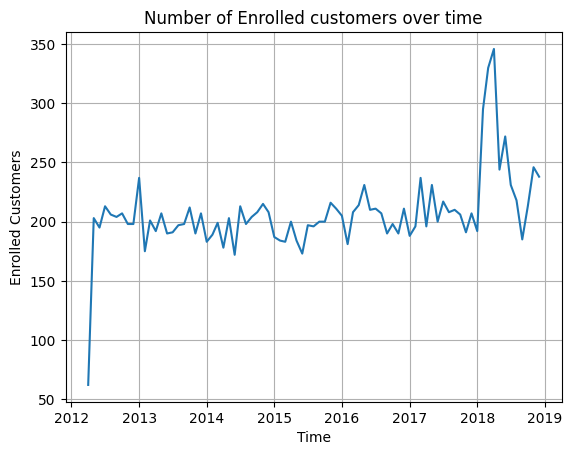

In [ ]:
plt.plot(df_customer_counts['date'],df_customer_counts['count'])
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Enrolled Customers')
plt.title('Customer Growth')

In [93]:
df_customer_card_count = df_customer.groupby(['Enrollment Year','Enrollment Month','Loyalty Card']).size().reset_index(name='Count')

In [103]:
df_customer_card_count = df_customer_card_count.rename(columns={"Enrollment Year":"year","Enrollment Month":"month"})

df_customer_card_count['time'] = pd.to_datetime(
  df_customer_card_count[['year','month']]
    .assign(day=1)
)

In [106]:
df_customer_card_count.head()

,year,month,Loyalty Card,Count,time
0,2012,4,Aurora,13,2012-04-01
1,2012,4,Nova,18,2012-04-01
2,2012,4,Star,31,2012-04-01
3,2012,5,Aurora,38,2012-05-01
4,2012,5,Nova,75,2012-05-01


Text(0.5, 1.0, 'Customer Growth across by card type')

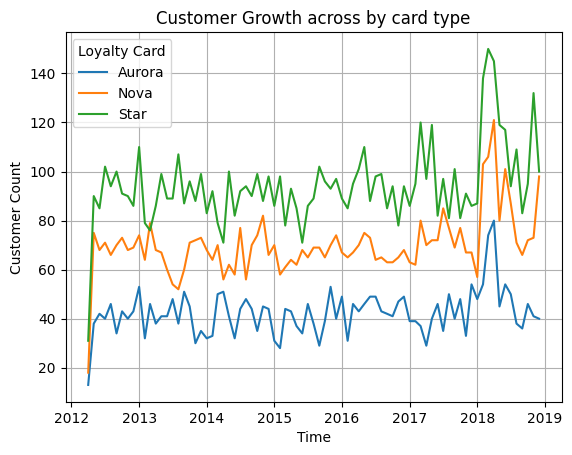

In [118]:
import seaborn as sns

sns.lineplot(data=df_customer_card_count, x="time", y="Count", hue="Loyalty Card")
plt.grid(True,zorder = 2)
plt.xlabel('Time')
plt.ylabel('Customer Count')
plt.title('Customer Growth across by card type')

In [ ]:
### Plot Count of Cancellations across time (Year+ month)

In [126]:
df_cancellation_count = df_customer.groupby(['Cancellation Year','Cancellation Month']).size().reset_index(name='Count')
df_cancellation_count = df_cancellation_count.rename(columns={"Cancellation Year":"year","Cancellation Month":"month"})

df_cancellation_count['time'] = pd.to_datetime(
  df_cancellation_count[['year','month']]
    .assign(day=1)
)

Text(0.5, 1.0, 'Customer Loss over time')

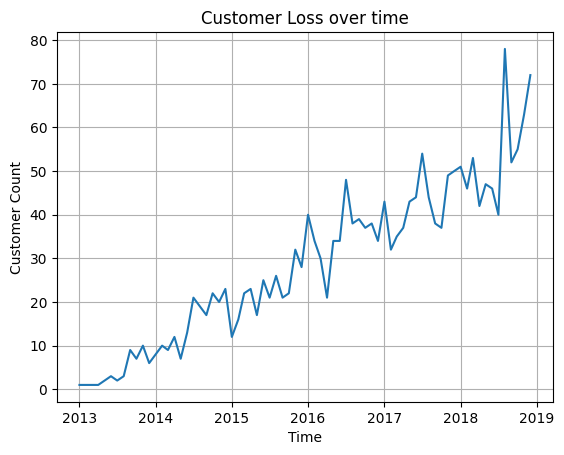

In [127]:
sns.lineplot(data=df_cancellation_count, x="time", y="Count")
plt.grid(True,zorder = 2)
plt.xlabel('Time')
plt.ylabel('Customer Count')
plt.title('Customer Loss over time')

In [ ]:
### Plot Count of Cancellations across time (Year+ month) - (across card statuses)

In [124]:
df_cancellation_card_count = df_customer.groupby(['Cancellation Year','Cancellation Month','Loyalty Card']).size().reset_index(name='Count')
df_cancellation_card_count = df_cancellation_card_count.rename(columns={"Cancellation Year":"year","Cancellation Month":"month"})

df_cancellation_card_count['time'] = pd.to_datetime(
  df_cancellation_card_count[['year','month']]
    .assign(day=1)
)

Text(0.5, 1.0, 'Customer Loss across by card type')

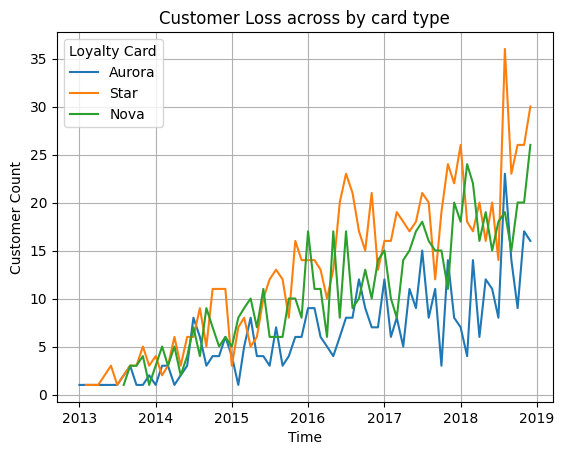

In [125]:
sns.lineplot(data=df_cancellation_card_count, x="time", y="Count", hue="Loyalty Card")
plt.grid(True,zorder = 2)
plt.xlabel('Time')
plt.ylabel('Customer Count')
plt.title('Customer Loss across by card type')

## Customer Flight Activity

In [128]:
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [129]:
df_flight.count()

Loyalty Number                 405624
Year                           405624
Month                          405624
Flights Booked                 405624
Flights with Companions        405624
Total Flights                  405624
Distance                       405624
Points Accumulated             405624
Points Redeemed                405624
Dollar Cost Points Redeemed    405624
dtype: int64

In [130]:
df_flight.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


### Flight Details

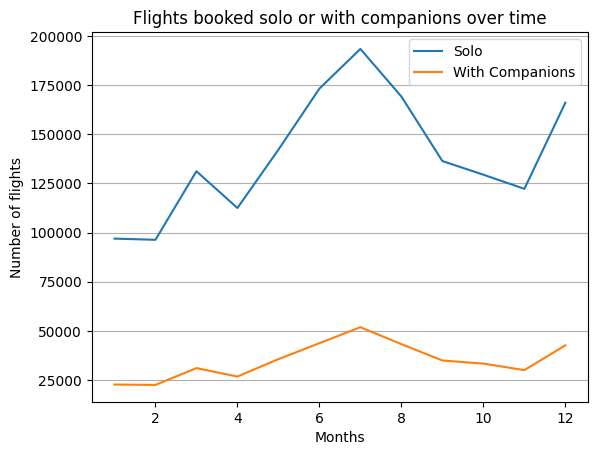

In [157]:
## Number of flights in each month (Solo/companion)

df_flight_booked = df_flight[['Month','Flights Booked','Flights with Companions','Total Flights']]

df_flights_month = df_flight_booked.groupby('Month').sum().reset_index()

plt.plot(df_flights_month['Month'],df_flights_month['Flights Booked'],label = 'Solo')
plt.plot(df_flights_month['Month'],df_flights_month['Flights with Companions'],label = 'With Companions')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Number of flights')
plt.title('Flights booked solo or with companions over time')
plt.grid(which='both',axis='y')

    Month  Distance
0       1  29759667
1       2  29408810
2       3  39494098
3       4  34294594
4       5  41375700
5       6  50622122
6       7  54486328
7       8  48709438
8       9  40007896
9      10  37910048
10     11  36000207
11     12  48281857


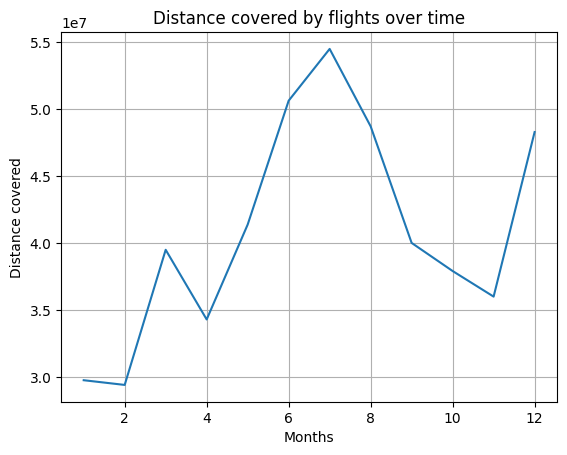

In [164]:
### Distance covered each month

df_flight_booked = df_flight[['Month','Distance']]

df_flights_distance = df_flight_booked.groupby('Month').sum().reset_index()


print(df_flights_distance)

plt.plot(df_flights_distance['Month'],df_flights_distance['Distance'])
plt.xlabel('Months')
plt.ylabel('Distance covered')
plt.title('Distance covered by flights over time')
plt.grid(True)

### Loyalty Metrics

In [169]:
df_loyalty = df_flight[['Year','Month','Points Accumulated','Dollar Cost Points Redeemed','Points Redeemed']]

In [172]:
df_loyalty.describe()

,Year,Month,Points Accumulated,Dollar Cost Points Redeemed,Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,2017.500000,6.500000,123.692721,2.484503,30.696872
std,0.500001,3.452057,146.599831,10.150038,125.486049
min,2017.000000,1.000000,0.000000,0.000000,0.000000
25%,2017.000000,3.750000,0.000000,0.000000,0.000000
50%,2017.500000,6.500000,50.000000,0.000000,0.000000
75%,2018.000000,9.250000,239.000000,0.000000,0.000000
max,2018.000000,12.000000,676.500000,71.000000,876.000000


In [176]:
df_loyalty['Dollar Cost Points Redeemed'].value_counts(normalize=True).sort_values(ascending=False)*100

Dollar Cost Points Redeemed
0     94.038568
36     0.255655
38     0.246780
40     0.244808
42     0.242343
39     0.232481
44     0.227551
41     0.225085
37     0.218675
43     0.216210
35     0.210047
34     0.208074
32     0.201418
33     0.197227
45     0.192050
30     0.190324
46     0.185640
31     0.177997
47     0.166410
48     0.157289
28     0.147427
29     0.146934
50     0.146688
49     0.140031
52     0.118829
51     0.107242
27     0.103791
54     0.099107
26     0.093436
53     0.092943
56     0.089985
55     0.084561
57     0.067550
58     0.065331
60     0.064099
59     0.053991
25     0.051526
63     0.043143
61     0.043143
62     0.038213
64     0.037473
24     0.027119
66     0.026133
65     0.022188
68     0.020955
67     0.016764
70     0.009368
69     0.006903
71     0.000493
Name: proportion, dtype: float64